# Lecture 20: The Normal Distribution

In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Standard Units ##

In [2]:
births = Table.read_table("baby.csv")
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


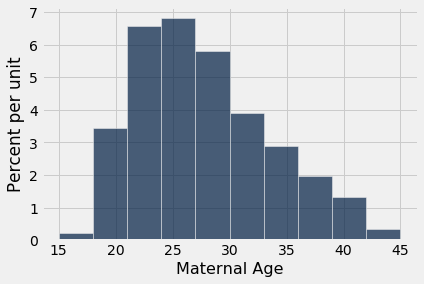

In [3]:
births.hist("Maternal Age")

In [4]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x))/np.std(x)

In [5]:
ages = births.column('Maternal Age')

In [6]:
ages_standard_units = standard_units(ages)
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

In [7]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [8]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


**Back to slides.**

In [9]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

## The SD and Bell Shaped Curves ##

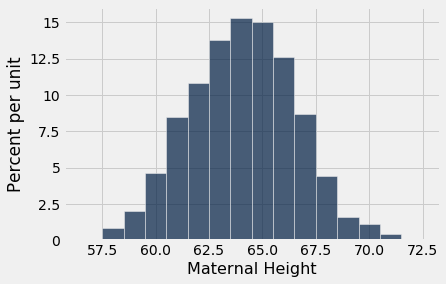

In [12]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [13]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.04940374787053, 2.5250254409674375)

**Back to slides.**

## Normal Distributions ##

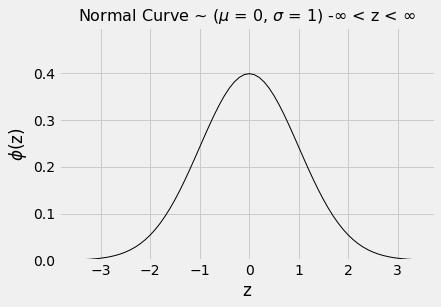

In [19]:
plot_normal_cdf()

In [20]:
from scipy import stats

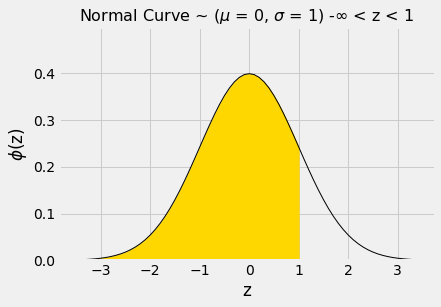

In [21]:
### The cumulative distribution function (cdf) for a normal distribution

plot_normal_cdf(1)

In [22]:
stats.norm.cdf(1)

0.8413447460685429

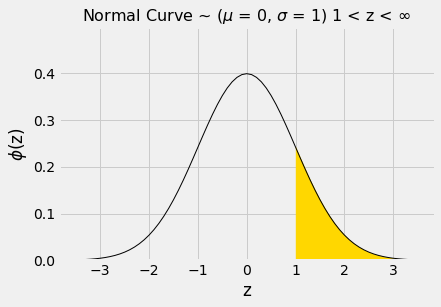

In [23]:
plot_normal_cdf(lbound=1)

In [24]:
1 - stats.norm.cdf(1)

0.15865525393145707

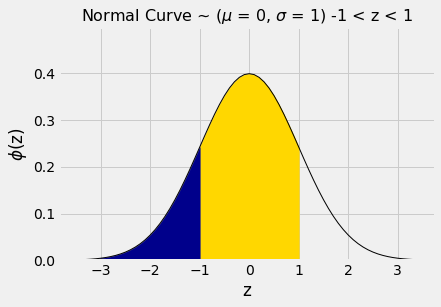

In [25]:
plot_normal_cdf(1,lbound=-1)

In [26]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

In [27]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

In [28]:
stats.norm.cdf(3) - stats.norm.cdf(-3)

0.9973002039367398

**Back to slides.**

## Normal from Sample Sums and Means ##

In [45]:
wheel = Table.read_table("roulette_wheel.csv")
wheel

Pocket,Color
0,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


In [46]:
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1    

red = wheel.with_column(
    'Winnings: Red', wheel.apply(red_winnings, 'Color')
    )

In [47]:
red.show()

Pocket,Color,Winnings: Red
0,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


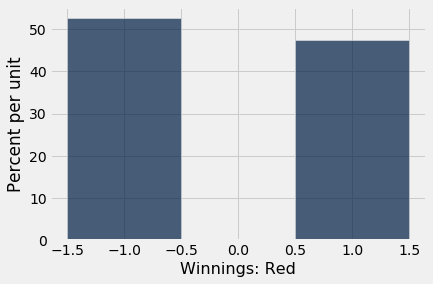

In [48]:
red.hist('Winnings: Red', bins = np.arange(-1.5, 1.6, 1))

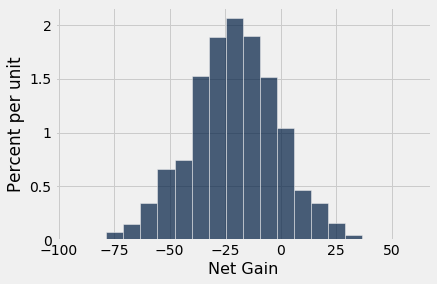

In [49]:
num_bets = 400
repetitions = 10000

net_gains = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    net = sum(spins.column('Winnings: Red'))
    net_gains = np.append(net_gains, net)
    
Table().with_columns('Net Gain', net_gains).hist(bins=20)

In [50]:
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


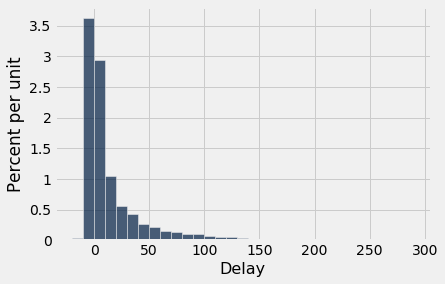

In [51]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [52]:
delays = united.column('Delay')
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

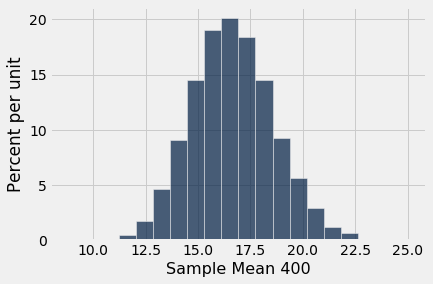

In [53]:
sample_size = 400
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sampled_flights = united.sample(sample_size)
    sample_mean = np.mean(sampled_flights.column('Delay'))
    means = np.append(means, sample_mean)
    
flight_delay = Table().with_columns('Sample Mean 400', means)
flight_delay.hist(bins = 20)

In [ ]:
flight_delay

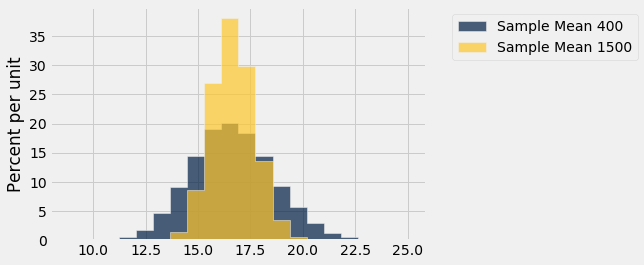

In [54]:
sample_size = 1500
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sampled_flights = united.sample(sample_size)
    sample_mean = np.mean(sampled_flights.column('Delay'))
    means = np.append(means, sample_mean)
    
flight_delay.with_column('Sample Mean 1500', means).hist(bins = 20)

## Variability of the Sample Average ##

In [57]:
"""Empirical distribution of random sample averages"""

def sample_means(sample_size):
    
    repetitions = 10000
    means = make_array()

    for i in range(repetitions):
        sampled_flights = united.sample(sample_size)
        sample_mean = np.mean(sampled_flights.column('Delay'))
        means = np.append(means, sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print('Repetitions :', repetitions)
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Repetitions : 10000
Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.661565
Population SD: 39.480199851609314
SD of sample means: 3.952459075154985


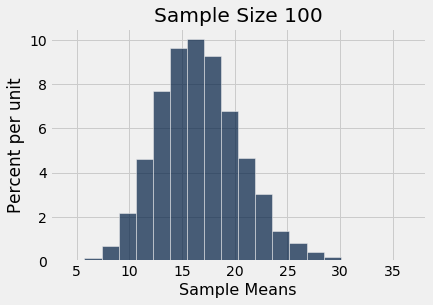

In [58]:
sample_means(100)

Repetitions : 10000
Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.669211999999998
Population SD: 39.480199851609314
SD of sample means: 1.9914034809791812


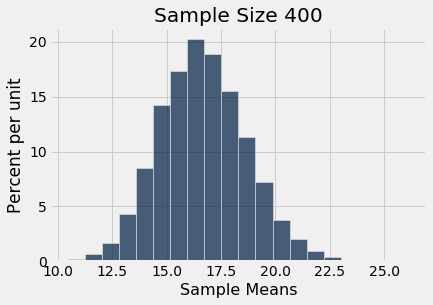

In [59]:
sample_means(400)

Repetitions : 10000
Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.65250608
Population SD: 39.480199851609314
SD of sample means: 1.58210515898629


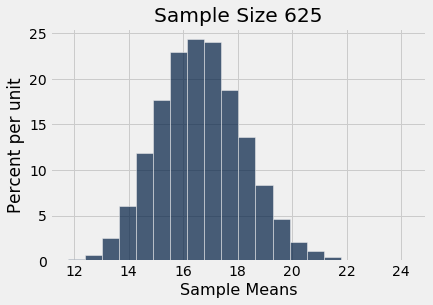

In [63]:
sample_means(625)

In [62]:
39.48/1.57

25.14649681528662

In [61]:
repetitions = 10000
sample_sizes = np.arange(25, 626, 25)

sd_of_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(united.sample(n).column('Delay')))
    sd_of_means = np.append(sd_of_means, np.std(means))

sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_of_means,
    'Population_SD/sqrt(n)', sd_delay/np.sqrt(sample_sizes)
)

In [64]:
sd_comparison

Sample Size n,"SD of 10,000 Sample Means",Population_SD/sqrt(n)
25,7.97693,7.89604
50,5.63028,5.58334
75,4.58583,4.55878
100,3.96958,3.94802
125,3.51188,3.53122
150,3.18195,3.22354
175,2.99773,2.98442
200,2.78345,2.79167
225,2.64463,2.63201
250,2.53927,2.49695


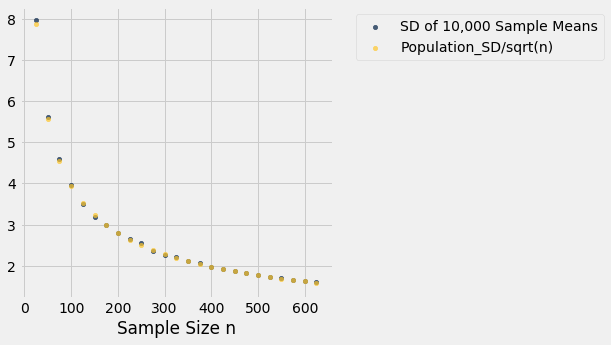

In [65]:
sd_comparison.scatter('Sample Size n')